In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss 
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

In [2]:
cancer=pd.read_csv("BreastCancer.csv",index_col=0)
lbl=LabelEncoder()
cancer['Class']=lbl.fit_transform(cancer['Class'])
cancer.head()

,Clump,UniCell_Size,Uni_CellShape,MargAdh,SEpith,BareN,BChromatin,NoemN,Mitoses,Class
Code,,,,,,,,,,
61634,5,4,3,1,2,2,2,3,1,0
63375,9,1,2,6,4,10,7,7,2,1
76389,10,4,7,2,2,8,6,1,1,1
95719,6,10,10,10,8,10,7,10,7,1
128059,1,1,1,1,2,5,5,1,1,0


In [3]:
X=cancer.drop('Class',axis=1)
y=cancer['Class']

In [4]:
xgbm=XGBClassifier(random_state=23)
params={'max_depth':[2,3,4,5,6,None],
        'learning_rate':np.linspace(0.001,0.999,10),
        'n_estimators':[50,100,150]}
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=23)

In [5]:
gcv=GridSearchCV(xgbm,param_grid=params,cv=kfold,scoring="neg_log_loss",verbose=1)
gcv.fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=23, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_typ...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=23, ...),
             param_grid={'learning_rate': array([0.001     , 0.11188889, 0.22277778, 0.33366667, 0.44455556,
       0.55544444, 0.66633333, 0.77722222, 0.88811111, 0.999     ]),
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_log_loss', verbose=1)

In [6]:
print("best parameter :",gcv.best_params_)
print("best score :",gcv.best_score_)

best parameter : {'learning_rate': 0.11188888888888888, 'max_depth': 3, 'n_estimators': 50}
best score : -0.11331688574321368


In [8]:
bm_xgb = gcv.best_estimator_

In [9]:
df_imp = pd.DataFrame({'variable':bm_xgb.feature_names_in_,
                       "importance":bm_xgb.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp = df_imp.sort_values(by ='importance')

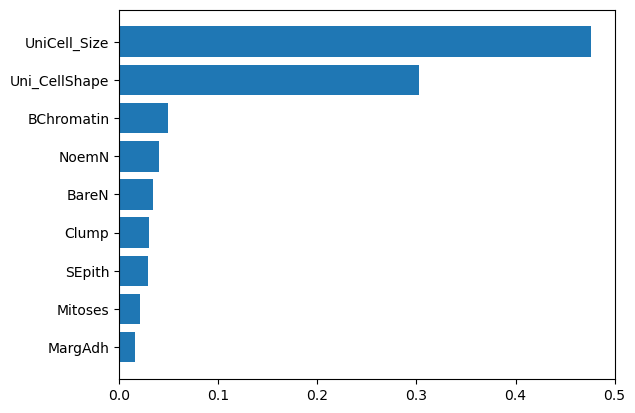

In [10]:
plt.barh(df_imp.variable,df_imp.importance);

In [11]:
!pip install ipywidgets

In [12]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/6d/cc/bc14c8580740f05159fb0d2245978672eff9b2994c502f6b8523727b62f4/catboost-1.2.2-cp311-cp311-manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.6 MB/s eta 0:00:000m eta 0:00:010:00:01m
